# K-means 

In [27]:
# Edwin Peter
# 177019

# Data preprocessing

In [28]:
import csv
import numpy as np
import pandas as pd
import urllib2
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score
from sklearn import model_selection

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
data = pd.read_csv(url)

data = np.asarray(data)
print data

[['M' 0.35 0.265 ..., 0.0485 0.07 7]
 ['F' 0.53 0.42 ..., 0.1415 0.21 9]
 ['M' 0.44 0.365 ..., 0.114 0.155 10]
 ..., 
 ['M' 0.6 0.475 ..., 0.2875 0.308 9]
 ['F' 0.625 0.485 ..., 0.261 0.29600000000000004 10]
 ['M' 0.71 0.555 ..., 0.3765 0.495 12]]


In [29]:
# Preprocessing
X = data[:,0:-1]
y = data[:,-1]
column_to_encode = X[:,0]
columns_to_scale = X[:,1:-1]

#OHE for 'M' and 'F'
encoder = preprocessing.LabelEncoder()
encoded = encoder.fit_transform(column_to_encode)

# Scaling
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(columns_to_scale)
encoded = np.array(encoded)
scaled = np.array(scaled)
new_X = np.column_stack((encoded,scaled))

# Classification using Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

classifier = DecisionTreeClassifier()
classifier.fit(new_X, y.astype(int))
prediction = classifier.predict(new_X)

confusion_matrix(y.astype(int),prediction.astype(int))

array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,  15,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 115,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 259,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [31]:
scores = model_selection.cross_val_score(classifier, new_X, y.astype(int), cv=5, scoring='accuracy')
print "Accuracy : {}%".format(scores.mean()*100)

Accuracy : 19.2100358843%


 # Finding optimal number of clusters



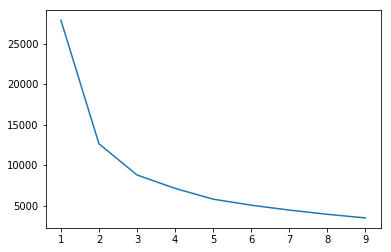

In [32]:
distance_to_centroid = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(new_X)
    distance_to_centroid.append(kmeans.inertia_)
    
plt.plot(range(1,10), distance_to_centroid)
plt.show()
# Optimal cluster = 5

# K means algorithm

In [33]:
num_clusters = 5
kmeans = KMeans(n_clusters = num_clusters, init='k-means++')
kmeans.fit(new_X)
prediction_clusters = kmeans.predict(new_X)
print prediction_clusters

[2 0 0 ..., 3 4 1]


In [34]:
cluster_dictionary = {}
for i in range(0,num_clusters):
    cluster_dictionary[i] = []

for cluster,data_x,data_y in zip(prediction_clusters, new_X, y):
    new_data = np.append(np.asarray(data_x), np.asarray(data_y))
    list = cluster_dictionary[cluster]
    list.append(new_data)

# Clusters:    
print np.asarray(cluster_dictionary[0])
#print np.asarray(cluster_dictionary[1])
#print np.asarray(cluster_dictionary[2])
#print np.asarray(cluster_dictionary[3])
#print np.asarray(cluster_dictionary[4])

[[  0.           0.0498915    0.12201495 ...,  -0.46361041  -0.35684354
    9.        ]
 [  2.          -0.69955786  -0.4322102  ...,  -0.64833409  -0.60773918
   10.        ]
 [  0.           0.0498915    0.07163085 ...,  -0.5514668   -0.35684354
   20.        ]
 ..., 
 [  1.          -0.40810533  -0.4322102  ...,  -0.57399408  -0.84038785
   10.        ]
 [  2.          -0.19992495  -0.28105788 ...,  -0.40729222  -0.49369571
    9.        ]
 [  0.          -0.07501672  -0.07952146 ...,  -0.32844674  -0.52562788
    8.        ]]


# Using Classification on each Kmeans cluster

In [35]:
from sklearn.ensemble import VotingClassifier

In [36]:
variables = np.asarray(cluster_dictionary[0])
x_var = variables[:,0:-1]
y_var = variables[:,-1]
print x_var, y_var

classifier = DecisionTreeClassifier()
classifier.fit(x_var, y_var)

[[ 0.          0.0498915   0.12201495 ..., -0.30960118 -0.46361041
  -0.35684354]
 [ 2.         -0.69955786 -0.4322102  ..., -0.63792816 -0.64833409
  -0.60773918]
 [ 0.          0.0498915   0.07163085 ..., -0.10465173 -0.5514668
  -0.35684354]
 ..., 
 [ 1.         -0.40810533 -0.4322102  ..., -0.67259622 -0.57399408
  -0.84038785]
 [ 2.         -0.19992495 -0.28105788 ..., -0.51353098 -0.40729222
  -0.49369571]
 [ 0.         -0.07501672 -0.07952146 ..., -0.43603766 -0.32844674
  -0.52562788]] [  9.  10.  20. ...,  10.   9.   8.]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
classifiers = []
for key in cluster_dictionary:
    variables = np.asarray(cluster_dictionary[key])
    x_var = variables[:,0:-1]
    y_var = variables[:,-1]
    
    # Split train and test sets
    #X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.25)
    #y_train = y_train.astype('int')

    classifier = DecisionTreeClassifier()
    #classifier.fit(X_train, y_train)
    classifier.fit(x_var, y_var)
    classifiers.append(classifier)
    
classifiers[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
 eclf1 = VotingClassifier(estimators=[('dtc1', classifiers[0]), 
                                      ('dtc2', classifiers[1]), 
                                      ('dtc3', classifiers[2]),
                                      ('dtc4', classifiers[3]),
                                      ('dtc5', classifiers[4])], voting='hard')

In [39]:
eclf1 = eclf1.fit(X_train, y_train)
prediction = eclf1.predict(X_test)

confusion_matrix(y_test.astype(int),prediction.astype(int))

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 1,  1,  5,  6,  3,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  7, 12, 11,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 12, 17, 24,  7,  7,  2,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  5, 21, 26, 21, 13,  4,  3,  0,  0,  1,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 14, 21, 29, 37, 17, 16,  2,  3,  2,  1,  2,  0,  1,
         0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  8, 12, 25, 36, 36, 26, 15,  3,  5,  7,  2,  0,  1,
         0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 12, 14, 39, 33, 25, 11, 12,  6,  2,  5,  1,  2,
         0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,

In [40]:
acc = eclf1.score(new_X, y.astype(int))
print "Accuracy : {}%".format(acc*100)

Accuracy : 79.7653256705%
